<a href="https://colab.research.google.com/github/gan1014/Machine_learning-projects/blob/main/creditcard_XG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler



In [2]:
df = pd.read_csv("creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
df.shape

(3973, 31)

In [6]:
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [27]:
df=df.dropna()

In [28]:
df['Class'].value_counts()


,count
Class,
0.0,207641
1.0,393


In [29]:
X=df.drop("Class",axis=1)
y=df["Class"]

In [30]:
scaler=StandardScaler()
X["Amount"]=scaler.fit_transform(X[["Amount"]])


In [31]:
# Remove rows with NaN values in y
not_nan_indices = y.dropna().index
X_filtered = X.loc[not_nan_indices]
y_filtered = y.loc[not_nan_indices]

X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_filtered,
    test_size=0.2,
    random_state=42,
    stratify=y_filtered
)

In [32]:
ratio = (y_train == 0).sum() / (y_train == 1).sum()
ratio

np.float64(529.0222929936306)

In [33]:
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    scale_pos_weight=ratio,
    eval_metric='logloss',
    random_state=42
)


In [34]:
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [35]:
y_pred = xgb.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[41522     6]
 [   11    68]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     41528
         1.0       0.92      0.86      0.89        79

    accuracy                           1.00     41607
   macro avg       0.96      0.93      0.94     41607
weighted avg       1.00      1.00      1.00     41607



In [36]:
y_prob = xgb.predict_proba(X_test)[:, 1]


In [37]:
y_pred_custom = (y_prob > 0.3).astype(int)

print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))


[[41519     9]
 [   11    68]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     41528
         1.0       0.88      0.86      0.87        79

    accuracy                           1.00     41607
   macro avg       0.94      0.93      0.94     41607
weighted avg       1.00      1.00      1.00     41607



In [38]:
import matplotlib.pyplot as plt

xgb.feature_importances_


array([0.01239202, 0.01324198, 0.01228944, 0.01299739, 0.05253565,
       0.00935823, 0.00528941, 0.01248298, 0.0531078 , 0.01268625,
       0.02966843, 0.00942513, 0.0340731 , 0.01664571, 0.5353561 ,
       0.0116333 , 0.00977951, 0.0222908 , 0.01426445, 0.02581598,
       0.01864363, 0.00501305, 0.01026064, 0.01436401, 0.00459989,
       0.00688876, 0.01036107, 0.00444304, 0.00414643, 0.01594584],
      dtype=float32)

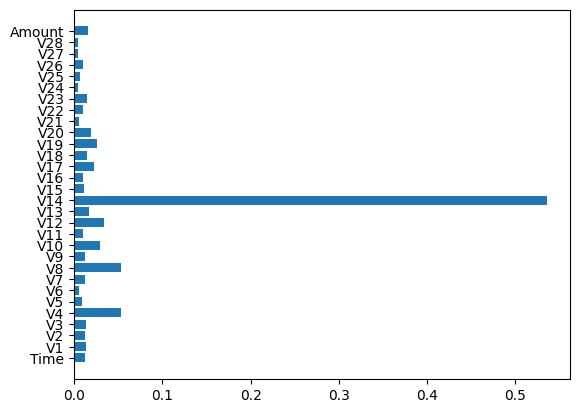

In [39]:
plt.barh(X.columns, xgb.feature_importances_)
plt.show()


In [43]:
import joblib
joblib.dump(model, 'fraud_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Files saved")

Files saved
